Steam 인디게임 개발자들의 게임판매량 예측 
================
한국산업기술대학교 게임공학과 2012180012 김찬현
-----------------------------
 (2017년 6월 28일 작성)

# 1 서론
본 주제를 연구하게 된 계기는 인디개발자들은 대기업 게임기업들보다 적게 수익을 낼까라는 단순한 의문에서 비롯하게 된 개인 연구주제이다.연구 주제는 1,2,3차로 주제가 나뉘어진다.



*1 차: 스팀에서 얻은 고객들의 게임평가 코멘트수를 기반으로한 게임다운로드 수 예측, Steamspy에서 제공하는 OWNERS데이터에서 얻은 최저 값을, 고객들이 실제로 다운로드 받은 값이라고 가정하여 결과 검정 모델 생성*

*2 차: 게임개발자들이 게임을 출시하기 이전에 유튜브로 자신들이 만든 게임들 홍보 및, 게임제작을 처음 시작한 날짜(게임회사는 설립날짜)를 기반으로 예측하는 게임다운로드 수 예측*

*3 차: 머신러닝을 활용하여 각 게임마다 사람들이 만족했던 부분을 자연어처리(NTLK방식)를 이용하여 긍정적으로 언급한 단어들(ex: 배경음이 좋다, 그래픽이 좋다)에 대해 각각 가중치를 부여하여, 순위가 가장 높이 언급된 게임요소들을 정렬하여 게임개발자들이 더욱 신경써야 하는부분을 도출 *

# 2. _들어가기 앞서서_


- 필자는 본 연구를 시행하기 앞서서 데이터를 처음 모은 시점이 2017년05월09일이다.프로그래밍 언어는 _파이썬_을 이용하였다.기본적으로 Pandas 를 이용하며 데이터는 하루에 15개씩 모아서, 모은 데이터들은 csv형식으로 저장한다. 2017년 7월30일날 1000개의 데이터가 모아질 예정이고, 이렇게 모은 데이터를 기반으로 데이터분석을 할 예정이다.

 - selenium을 이용한 웹 크롤링 방식을 사용하여 데이터를 수집할 생각이였으나 이는 아래와 같은 사유로 불가함을 알고 직접 데이터를 수집하기 시작하였다.

    *1. Steam에서 제공하는 Release date(스팀에서의 출시일자)값이 잘못 나와있는 경우가 있다. 이는 잘못된 데이터를 수집하게 하는 원인이 된다.
    *2. 구하고자하는 column의 값들(ex: 게임엔진, 각 게임회사들의 설립날짜 및 개인개발자들의 게임초기제작날짜, 유튜브에 올라온 초기 업로드 홍보영상날짜)을 찾기위해서는 많은 검색작업이 필요하며 수 많은 사이트를 둘러봐야하는데, 크롤링으로는 불가하다는 판단을 내렸다.

- 현재 2017년 6월28일 기준으로 모인 데이터는 총 370개 (추가업데이트 필요)


- 데이터 1000개는 모집단으로 턱없이 부족한 갯수임을 인지하고 있지만, 실질적으로 데이터를 만 개 단위까지 모으기에는 졸업작품과 병행하기에 시간이 부족하기 때문에, 머신러닝을 이용한 회귀분석과 자연어 처리를 통한 고객들의 반응 평가에서 가장 긍정적으로 뽑힌 단어들의 순위를 인공지능이 알려주는 것에 초점을 맞추어 연구과제를 실시할 예정이다.

- 게임데이터는 내년 2018년 8월까지 만 개를 모을 생각이며, 졸업작품으로 써가 아닌 개인 연구과제로 계속 진행해 나갈 예정이다.

###  Columns 소개

- 게임이름
- 데이터 조사날짜
- 스팀 리뷰 수
- 스팀외 리뷰 수
- 스팀발매 일자
- 평점
- 장르
- 장르2 (차후 추가해야함)
- 사용된 게임엔진
- 개발자 or 게임회사 이름
- 개발자 초기 게임 제작 날짜 or 게임회사 초기 설립날짜
- 개발자 or 게임회사의 존속기간
- 게임의 View방식 (2D,3D)
- 게임 출시 전에 유튜브에 올린 초기 게임 홍보영상(게임 제작과정 업로드 포함)
- Owner Value (유저들이 게임을 다운로드 받은 횟수 라고 가정하는 값)

-------------------------------------------------
아래는 파이썬 코드부분입니다.

-------------------------------------------------

In [49]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('./gamedevelopinfo.csv')

###### '비고' 열부터 끝까지 지우기 (현재 데이터가 다 채워지지않아서 의미가없음) - 6.28일기준

In [51]:
df = df.drop(df.loc[:,'비고':],axis=1) 


In [52]:
df=df.dropna(thresh=3)
df.head()

,게임제목,조사날짜,스팀리뷰수,스팀외리뷰수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간
0,Little Nightmare,2017-05-09,1196.0,331,2017-04-28,9,25800.0,Unreal,호러,2015-02-25,Tarsier Studios,2004년,13년
1,Bendy and the Ink machine Chapter one,2017-05-09,29.0,1307,2017-04-27,9,0.0,Unity,호러,2016-05-11,TheMeatly Games,2017년 1월,4개월
2,The SEXY BRUTAL,2017-05-09,214.0,14,2017-04-11,9,21000.0,Unity,어드벤쳐,2016-08-19,Tequila Works,2009년,8년
3,Bendy and the Ink machine Chapter two,2017-05-09,89.0,7,2017-04-27,9,6500.0,Unity,호러,2016-05-11,TheMeatly Games,2017년 1월,4개월
4,Ori and the Blind Forest,2017-05-09,4734.0,713,2015-03-11,10,10500.0,Unity,액션,2014-06-09,Moon studios Gmbh,2010년,7년


In [53]:
EngineName=df['엔진플랫폼'].value_counts().drop(['질문중-steam','질문중-youtube','질문해야함','질문중 -steam','질문중 -Steam','질문해야함-누가 질문해놨음','질문중 -Youtube']).index.tolist()


In [54]:
EngineCount=df['엔진플랫폼'].value_counts().drop(['질문중-steam','질문중-youtube','질문해야함','질문중 -steam','질문중 -Steam','질문해야함-누가 질문해놨음','질문중 -Youtube'])


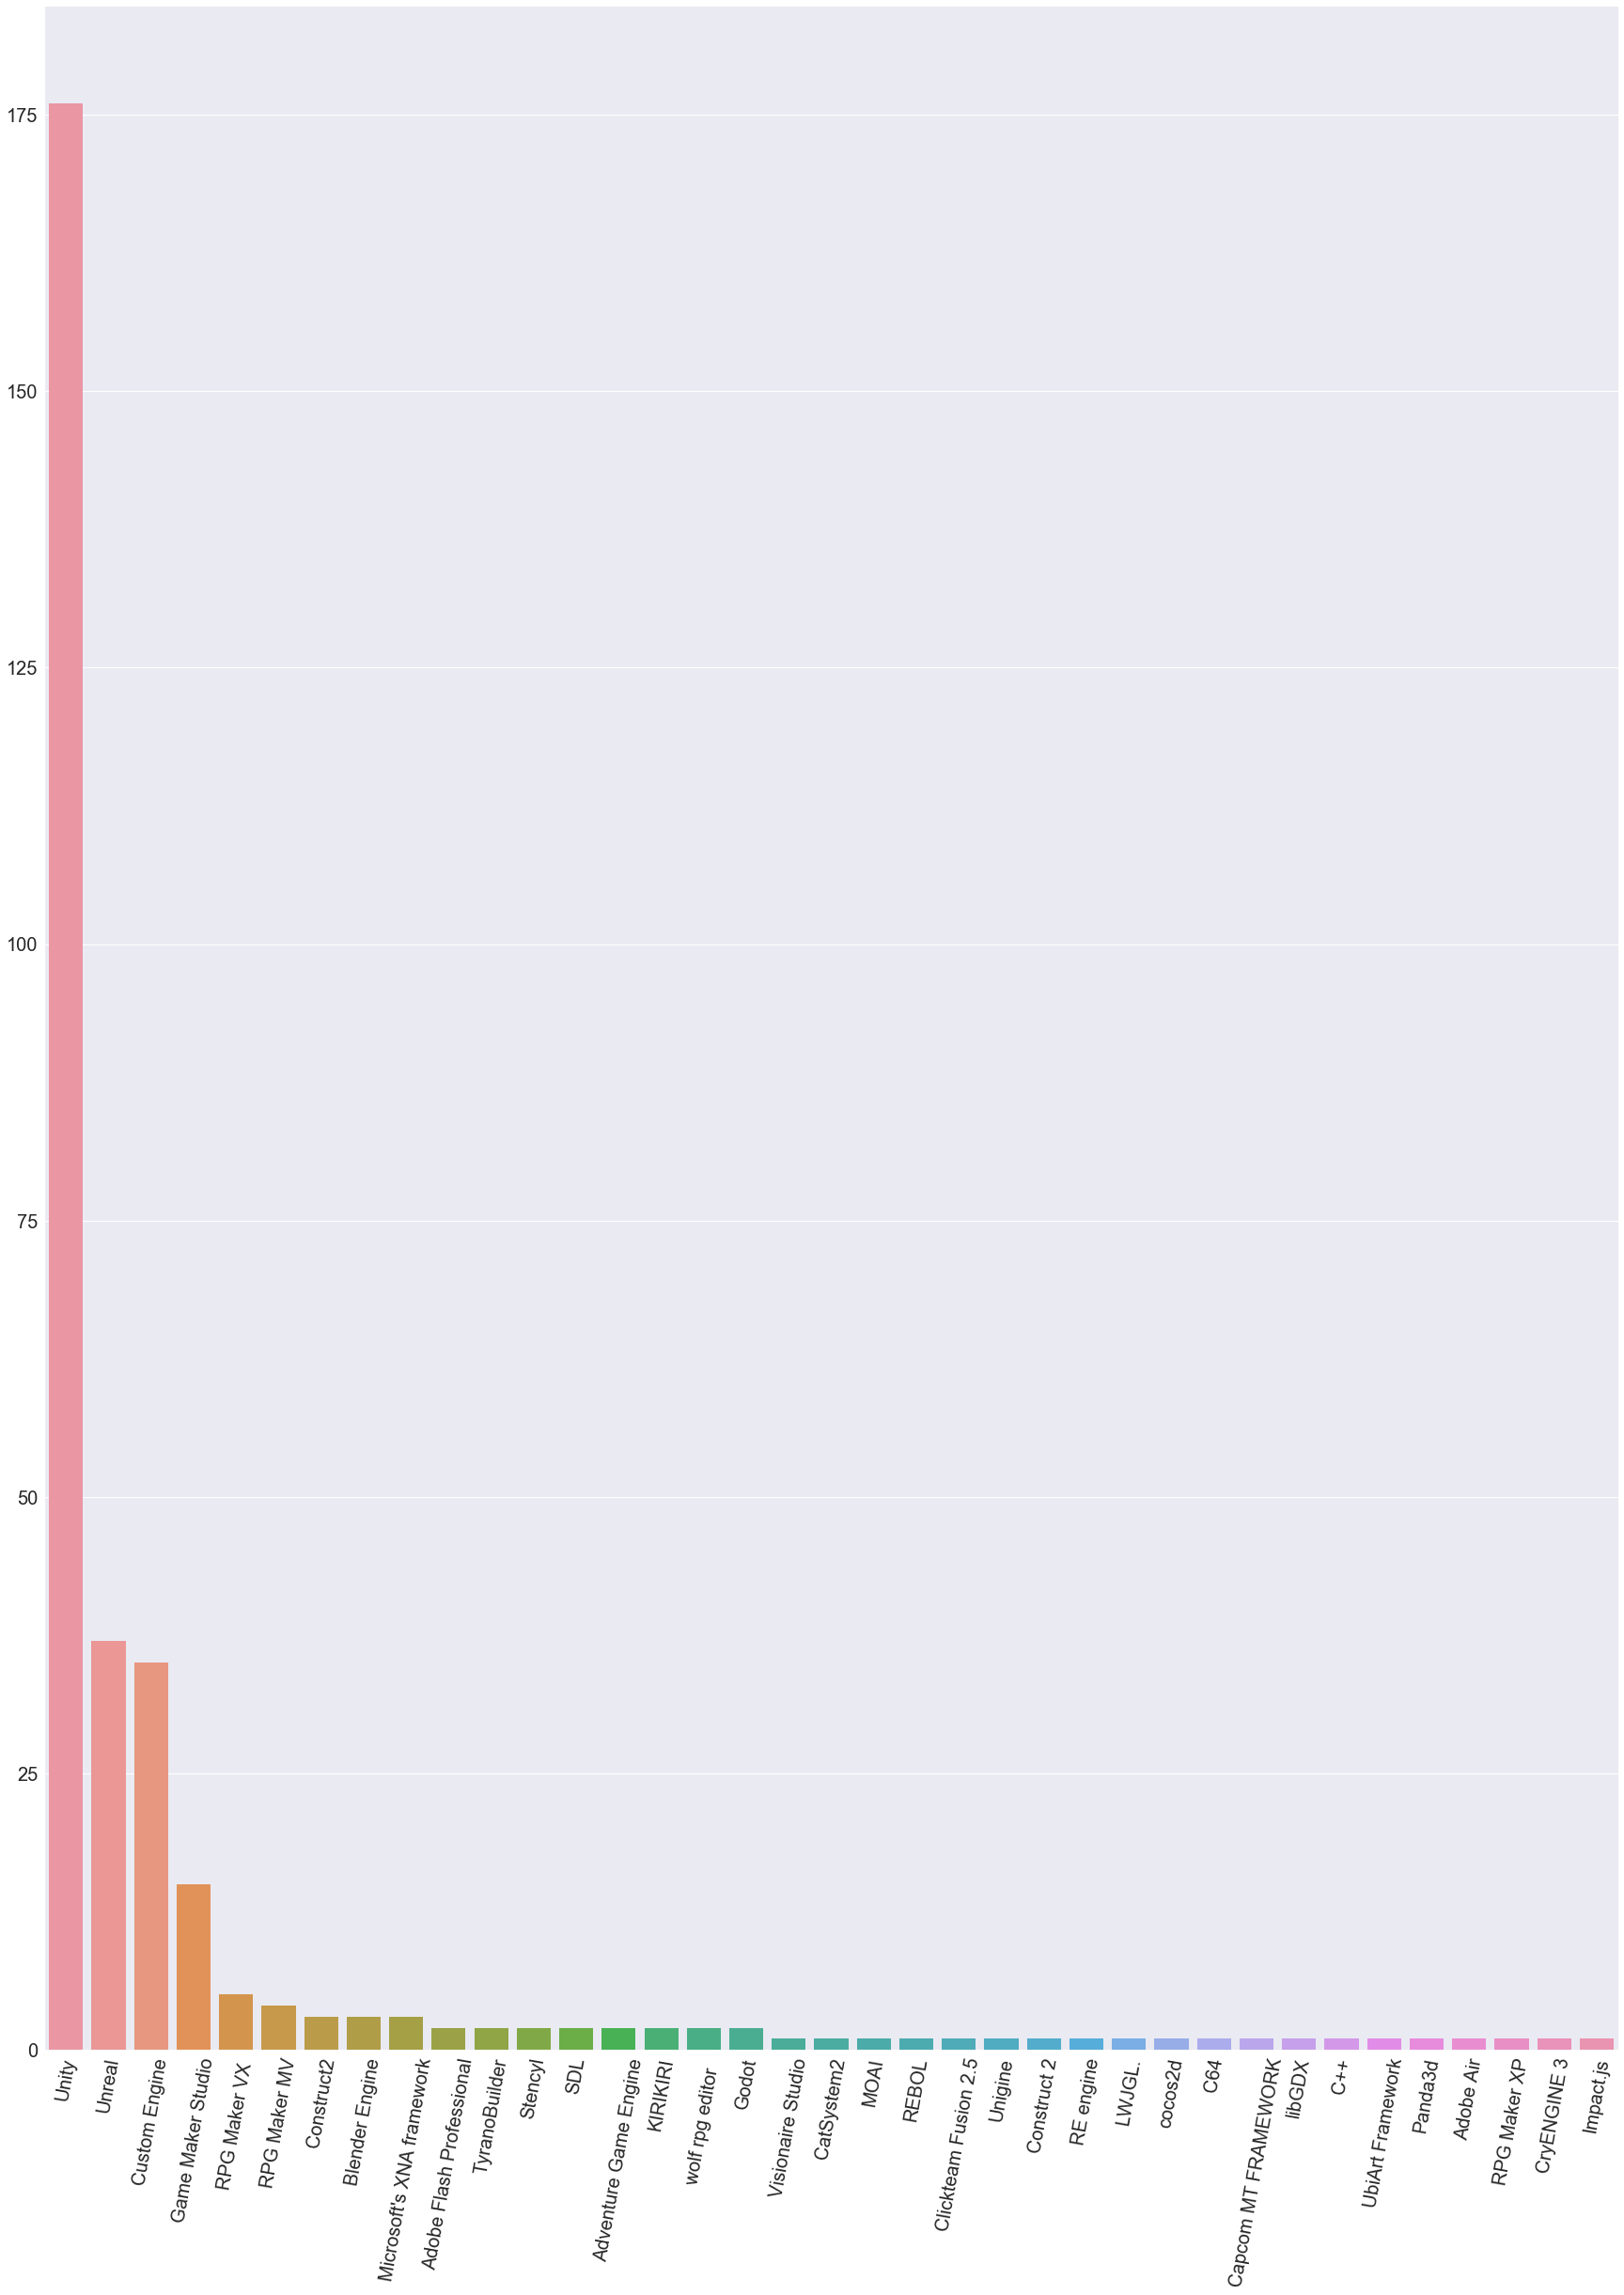

In [55]:
plt.figure(figsize=(30,40))
ax=sns.barplot(EngineCount.index,EngineCount.values)
ax=ax.set_xticklabels(EngineName,rotation=80,fontsize=20)
ax=plt.rc('ytick',labelsize=20)
plt.show()

In [74]:
df['평점']=pd.to_numeric(df['평점'])
df.groupby(['장르'])['평점'].mean()

장르
RPG       8.000000
VR        7.937500
고어        9.000000
시뮬레이션     8.666667
아케이드      8.000000
액션        8.032258
어드벤쳐      8.132812
전략        8.000000
캐쥬얼       7.639344
캐쥬얼,퍼즐    5.500000
퍼즐        8.333333
호러        7.909091
Name: 평점, dtype: float64

In [62]:
import datetime
from dateutil.parser import parse as parse_date

In [58]:
dataTime_list=[]
#datalist.append(parse_date(df['조사날짜'][0]))

In [59]:
#EngineName=df['엔진플랫폼'].value_counts().index.tolist()
length = len(df['조사날짜'].value_counts().index.tolist())
df['조사날짜'].value_counts().index.tolist()

['2017-06-14',
 '2017-06-17',
 '2017-06-07',
 '2017-06-18',
 '2017-06-13',
 '2017-06-26',
 '2017-06-20',
 '2017-06-11',
 '2017-06-19',
 '2017-06-15',
 '2017-06-16',
 '2017-06-23',
 '2017-06-22',
 '2017-06-25',
 '2017-05-09',
 '2017-06-10',
 '2017-06-08',
 '2017-05-13',
 '2017-05-24',
 '2017-05-25',
 '2017-05-27',
 '2017-06-04',
 '2017-05-30',
 '2017-05-29',
 '2017-05-10',
 '2017-05-28',
 '2017-06-01',
 '2017-06-03',
 '2017-05-22',
 '2017-06-06',
 '2017-06-05',
 '2017-05-31',
 '2017-05-14',
 '2017-06-09',
 '2017-05-20',
 '2017-06-24',
 '2017-06-21']

In [60]:
for i,v in enumerate(df['조사날짜'].value_counts().index.tolist()):
    dataTime_list.append(parse_date(v))

NameError: name 'parse_date' is not defined

In [15]:
dataTime_list.sort()

In [16]:
dataTime_list

[datetime.datetime(2017, 5, 9, 0, 0),
 datetime.datetime(2017, 5, 10, 0, 0),
 datetime.datetime(2017, 5, 13, 0, 0),
 datetime.datetime(2017, 5, 14, 0, 0),
 datetime.datetime(2017, 5, 20, 0, 0),
 datetime.datetime(2017, 5, 22, 0, 0),
 datetime.datetime(2017, 5, 24, 0, 0),
 datetime.datetime(2017, 5, 25, 0, 0),
 datetime.datetime(2017, 5, 27, 0, 0),
 datetime.datetime(2017, 5, 28, 0, 0),
 datetime.datetime(2017, 5, 29, 0, 0),
 datetime.datetime(2017, 5, 30, 0, 0),
 datetime.datetime(2017, 5, 31, 0, 0),
 datetime.datetime(2017, 6, 1, 0, 0),
 datetime.datetime(2017, 6, 3, 0, 0),
 datetime.datetime(2017, 6, 4, 0, 0),
 datetime.datetime(2017, 6, 5, 0, 0),
 datetime.datetime(2017, 6, 6, 0, 0),
 datetime.datetime(2017, 6, 7, 0, 0),
 datetime.datetime(2017, 6, 8, 0, 0),
 datetime.datetime(2017, 6, 9, 0, 0),
 datetime.datetime(2017, 6, 10, 0, 0),
 datetime.datetime(2017, 6, 11, 0, 0),
 datetime.datetime(2017, 6, 13, 0, 0),
 datetime.datetime(2017, 6, 14, 0, 0)]

In [17]:
df.groupby('조사날짜')['유튜브등록날짜'].describe()

,count,unique,top,freq
조사날짜,,,,
2017-05-09,11,10,2016-05-11,2
2017-05-10,5,5,2015-03-02,1
2017-05-13,8,8,2017-04-26,1
2017-05-14,5,5,2010-05-10,1
2017-05-20,4,4,2017-01-26,1
2017-05-22,5,5,2016-08-22,1
2017-05-24,6,6,2016-08-26,1
2017-05-25,5,5,2016-03-16,1
2017-05-27,5,5,2017-02-25,1


In [18]:
df['조사날짜'].value_counts().index

Index(['2017-06-14', '2017-06-07', '2017-06-11', '2017-06-13', '2017-06-10',
       '2017-05-09', '2017-06-08', '2017-05-13', '2017-05-24', '2017-06-03',
       '2017-05-29', '2017-05-30', '2017-06-04', '2017-05-10', '2017-05-27',
       '2017-05-28', '2017-05-31', '2017-06-06', '2017-06-01', '2017-05-14',
       '2017-05-22', '2017-05-25', '2017-06-05', '2017-05-20', '2017-06-09'],
      dtype='object')

In [19]:
between_Pubdate_UtubeRegister=[]
for index,row in df.iterrows():
    #if (parse_date(row['조사날짜']) - parse_date(row['유튜브등록날짜'])<0):
        #print(parse['조사날짜'])
    
    between_Pubdate_UtubeRegister.append((parse_date(row['스팀발매일']) - parse_date(row['유튜브등록날짜'])))

In [20]:
between_Pubdate_UtubeRegister

[datetime.timedelta(793),
 datetime.timedelta(351),
 datetime.timedelta(235),
 datetime.timedelta(351),
 datetime.timedelta(275),
 datetime.timedelta(138),
 datetime.timedelta(1015),
 datetime.timedelta(1),
 datetime.timedelta(-1),
 datetime.timedelta(74),
 datetime.timedelta(74),
 datetime.timedelta(75),
 datetime.timedelta(80),
 datetime.timedelta(171),
 datetime.timedelta(576),
 datetime.timedelta(9),
 datetime.timedelta(351),
 datetime.timedelta(288),
 datetime.timedelta(0),
 datetime.timedelta(17),
 datetime.timedelta(105),
 datetime.timedelta(989),
 datetime.timedelta(1123),
 datetime.timedelta(26),
 datetime.timedelta(307),
 datetime.timedelta(1049),
 datetime.timedelta(450),
 datetime.timedelta(36),
 datetime.timedelta(173),
 datetime.timedelta(500),
 datetime.timedelta(592),
 datetime.timedelta(567),
 datetime.timedelta(109),
 datetime.timedelta(372),
 datetime.timedelta(31),
 datetime.timedelta(256),
 datetime.timedelta(133),
 datetime.timedelta(40),
 datetime.timedelta(9),
 

In [21]:
df['스팀발매일이전까지의유튜브등록날짜']=between_Pubdate_UtubeRegister



In [22]:
df.tail()

,게임제목,조사날짜,스팀다운로드횟수,스팀외다운로드 횟수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,스팀발매일이전까지의유튜브등록날짜
199,Sig.NULL,2017-06-14,18,15,2016-09-27,7.0,2200.0,질문중 -Steam,캐쥬얼,2014-05-16,SaintHeiser,2011년,6년,865 days
200,Trick & Treat,2017-06-14,68,893,2016-09-27,10.0,0.0,Game Maker Studio,어드벤쳐,2016-05-17,Rabbiton,2015년,2년,133 days
201,Haydee,2017-06-14,890,69,2016-09-27,9.0,16000.0,Custom Engine,액션,2016-07-31,Haydee Interactive,2016년,1년,58 days
202,Pavilion,2017-06-14,34,12,2016-09-24,8.0,10500.0,Unity,어드벤쳐,2012-10-17,Visiontrick Media,2012년,5년,1438 days
203,DROD: Gunthro and the Epic Blunder,2017-06-14,16,20,2012-04-02,8.0,10500.0,Custom Engine,어드벤쳐,2012-09-04,Caravel Games,2002년,15년,-155 days


In [23]:
df.groupby('스팀다운로드횟수')['스팀발매일이전까지의유튜브등록날짜'].max()

스팀다운로드횟수
0        881 days
1        500 days
10      1049 days
102       29 days
1032     236 days
11       197 days
11234    138 days
1126       0 days
117       30 days
119       15 days
1196     793 days
12       873 days
122     1007 days
13      1557 days
1313       0 days
133       85 days
139      870 days
14       172 days
15        74 days
155      224 days
16       888 days
17        48 days
170      198 days
18       865 days
181      145 days
185      173 days
19       807 days
1922      74 days
2        977 days
20       592 days
           ...   
54       123 days
549      221 days
56         6 days
57       429 days
6          1 days
60      1213 days
62       357 days
63      1005 days
639       72 days
64       256 days
652        3 days
67       931 days
679      873 days
68       133 days
69       468 days
7        116 days
7074     225 days
71       658 days
74       136 days
76       393 days
83      1123 days
866      637 days
88      1015 days
89       351 days
8

In [24]:
df['총다운로드수']=pd.to_numeric(df['스팀다운로드횟수'],errors='ignore')+pd.to_numeric(df['스팀외다운로드 횟수'],errors='ignore')

In [25]:
df.head()

,게임제목,조사날짜,스팀다운로드횟수,스팀외다운로드 횟수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,스팀발매일이전까지의유튜브등록날짜,총다운로드수
0,Little Nightmare,2017-05-09,1196,331,2017-04-28,9.0,25800.0,Unreal,호러,2015-02-25,Tarsier Studios,2004년,13년,793 days,1527
1,Bendy and the Ink machine Chapter one,2017-05-09,29,1307,2017-04-27,9.0,0.0,Unity,호러,2016-05-11,TheMeatly Games,2017년,4개월,351 days,1336
2,The SEXY BRUTAL,2017-05-09,214,14,2017-04-11,9.0,21000.0,Unity,어드벤쳐,2016-08-19,Tequila Works,2009년,8년,235 days,228
3,Bendy and the Ink machine Chapter two,2017-05-09,89,7,2017-04-27,9.0,6500.0,Unity,호러,2016-05-11,TheMeatly Games,2017년,4개월,351 days,96
4,Ori and the Blind Forest,2017-05-09,4734,713,2015-03-11,10.0,10500.0,Unity,액션,2014-06-09,Moon studios Gmbh,2010년,7년,275 days,5447


In [26]:
df['매출액']=df['총다운로드수']*df['가격']

In [27]:
df.tail()

,게임제목,조사날짜,스팀다운로드횟수,스팀외다운로드 횟수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,스팀발매일이전까지의유튜브등록날짜,총다운로드수,매출액
199,Sig.NULL,2017-06-14,18,15,2016-09-27,7.0,2200.0,질문중 -Steam,캐쥬얼,2014-05-16,SaintHeiser,2011년,6년,865 days,33,72600.0
200,Trick & Treat,2017-06-14,68,893,2016-09-27,10.0,0.0,Game Maker Studio,어드벤쳐,2016-05-17,Rabbiton,2015년,2년,133 days,961,0.0
201,Haydee,2017-06-14,890,69,2016-09-27,9.0,16000.0,Custom Engine,액션,2016-07-31,Haydee Interactive,2016년,1년,58 days,959,15344000.0
202,Pavilion,2017-06-14,34,12,2016-09-24,8.0,10500.0,Unity,어드벤쳐,2012-10-17,Visiontrick Media,2012년,5년,1438 days,46,483000.0
203,DROD: Gunthro and the Epic Blunder,2017-06-14,16,20,2012-04-02,8.0,10500.0,Custom Engine,어드벤쳐,2012-09-04,Caravel Games,2002년,15년,-155 days,36,378000.0


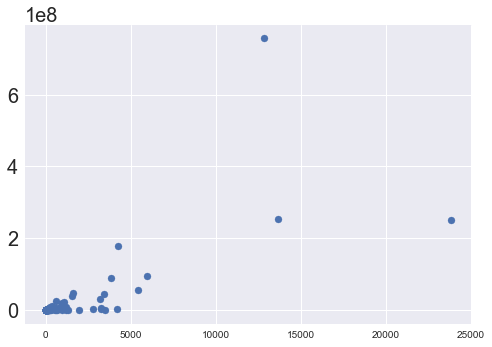

In [28]:
plt.scatter(df['총다운로드수'],df['매출액'])
plt.show()

In [29]:
df[df['총다운로드수']>10000]

,게임제목,조사날짜,스팀다운로드횟수,스팀외다운로드 횟수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,스팀발매일이전까지의유튜브등록날짜,총다운로드수,매출액
5,Buy Valiant Hearts: The Great War /,2017-05-09,11234,2431,2014-01-26,10.0,18500.0,UbiArt Framework,어드벤쳐,2013-09-10,Ubisoft,1986년,31년,138 days,13665,252802500.0
26,Limbo,2017-05-14,8969,14892,2011-08-03,10.0,10500.0,Custom Engine,어드벤쳐,2010-05-10,Playdead,2006년,11년,450 days,23861,250540500.0
57,RESIDENT EVIL 7 biohazard,2017-05-28,7074,5748,2017-01-24,9.0,59000.0,RE engine,액션,2016-06-13,CAPCOM,1979년,38년,225 days,12822,756498000.0


In [30]:
df[df['매출액']>10000000]

,게임제목,조사날짜,스팀다운로드횟수,스팀외다운로드 횟수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,스팀발매일이전까지의유튜브등록날짜,총다운로드수,매출액
0,Little Nightmare,2017-05-09,1196,331,2017-04-28,9.0,25800.0,Unreal,호러,2015-02-25,Tarsier Studios,2004년,13년,793 days,1527,39396600.0
4,Ori and the Blind Forest,2017-05-09,4734,713,2015-03-11,10.0,10500.0,Unity,액션,2014-06-09,Moon studios Gmbh,2010년,7년,275 days,5447,57193500.0
5,Buy Valiant Hearts: The Great War /,2017-05-09,11234,2431,2014-01-26,10.0,18500.0,UbiArt Framework,어드벤쳐,2013-09-10,Ubisoft,1986년,31년,138 days,13665,252802500.0
10,Machinarium,2017-05-09,1922,1270,2009-10-17,9.0,10000.0,REBOL,어드벤쳐,2009-08-04,Amanita Design,2003년,14년,74 days,3192,31920000.0
13,Trine3,2017-05-10,2845,1019,2015-08-20,6.0,23000.0,Custom Engine,액션,2015-03-02,Frozenbyte,2001년,16년,171 days,3864,88872000.0
14,Syberia3,2017-05-10,354,261,2017-04-20,6.0,43000.0,Unity,어드벤쳐,2015-09-22,Microids,1984년,33년,576 days,615,26445000.0
24,Braid,2017-05-14,3588,2346,2009-04-11,9.0,16000.0,Microsoft's XNA framework,캐쥬얼,2008-06-08,Number None,2006년,11년,307 days,5934,94944000.0
26,Limbo,2017-05-14,8969,14892,2011-08-03,10.0,10500.0,Custom Engine,어드벤쳐,2010-05-10,Playdead,2006년,11년,450 days,23861,250540500.0
53,Maize,2017-05-27,170,214,2016-12-02,9.0,27000.0,Unreal,어드벤쳐,2016-05-18,Finish Line Games,2013년,4년,198 days,384,10368000.0
57,RESIDENT EVIL 7 biohazard,2017-05-28,7074,5748,2017-01-24,9.0,59000.0,RE engine,액션,2016-06-13,CAPCOM,1979년,38년,225 days,12822,756498000.0


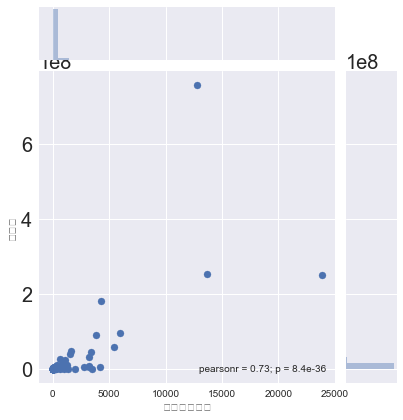

In [31]:
plt.figure(figsize=(10,10))
sns.jointplot(x=u'총다운로드수',y=u'매출액',data=df)
plt.show()

In [32]:
dateCount=pd.to_numeric(df['스팀발매일이전까지의유튜브등록날짜'])
dateCount

0       68515200000000000
1       30326400000000000
2       20304000000000000
3       30326400000000000
4       23760000000000000
5       11923200000000000
6       87696000000000000
7          86400000000000
8         -86400000000000
9        6393600000000000
10       6393600000000000
11       6480000000000000
12       6912000000000000
13      14774400000000000
14      49766400000000000
15        777600000000000
16      30326400000000000
17      24883200000000000
18                      0
19       1468800000000000
20       9072000000000000
21      85449600000000000
22      97027200000000000
23       2246400000000000
24      26524800000000000
25      90633600000000000
26      38880000000000000
27       3110400000000000
28      14947200000000000
29      43200000000000000
              ...        
174        86400000000000
175      -518400000000000
176        86400000000000
177                     0
178                     0
179      5011200000000000
180                     0
181         

In [33]:
dateCount=dateCount/60/60/24/100000000000*10**2

In [34]:
dateCount

0       793.0
1       351.0
2       235.0
3       351.0
4       275.0
5       138.0
6      1015.0
7         1.0
8        -1.0
9        74.0
10       74.0
11       75.0
12       80.0
13      171.0
14      576.0
15        9.0
16      351.0
17      288.0
18        0.0
19       17.0
20      105.0
21      989.0
22     1123.0
23       26.0
24      307.0
25     1049.0
26      450.0
27       36.0
28      173.0
29      500.0
        ...  
174       1.0
175      -6.0
176       1.0
177       0.0
178       0.0
179      58.0
180       0.0
181       0.0
182     221.0
183       8.0
184      -1.0
185     160.0
186     160.0
187     357.0
188     116.0
189      29.0
190       3.0
191       0.0
192       0.0
193     873.0
194     190.0
195      87.0
196     123.0
197     178.0
198     510.0
199     865.0
200     133.0
201      58.0
202    1438.0
203    -155.0
Name: 스팀발매일이전까지의유튜브등록날짜, Length: 204, dtype: float64

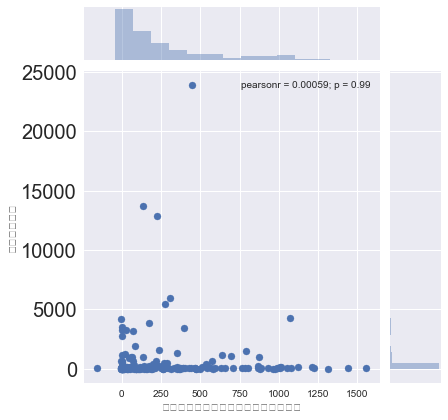

In [35]:
plt.figure(figsize=(10,10))
sns.jointplot(x=dateCount, y=df['총다운로드수'])
plt.show()

In [36]:
df.tail()

,게임제목,조사날짜,스팀다운로드횟수,스팀외다운로드 횟수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,스팀발매일이전까지의유튜브등록날짜,총다운로드수,매출액
199,Sig.NULL,2017-06-14,18,15,2016-09-27,7.0,2200.0,질문중 -Steam,캐쥬얼,2014-05-16,SaintHeiser,2011년,6년,865 days,33,72600.0
200,Trick & Treat,2017-06-14,68,893,2016-09-27,10.0,0.0,Game Maker Studio,어드벤쳐,2016-05-17,Rabbiton,2015년,2년,133 days,961,0.0
201,Haydee,2017-06-14,890,69,2016-09-27,9.0,16000.0,Custom Engine,액션,2016-07-31,Haydee Interactive,2016년,1년,58 days,959,15344000.0
202,Pavilion,2017-06-14,34,12,2016-09-24,8.0,10500.0,Unity,어드벤쳐,2012-10-17,Visiontrick Media,2012년,5년,1438 days,46,483000.0
203,DROD: Gunthro and the Epic Blunder,2017-06-14,16,20,2012-04-02,8.0,10500.0,Custom Engine,어드벤쳐,2012-09-04,Caravel Games,2002년,15년,-155 days,36,378000.0


In [37]:
import re
df['회사존속기간']='2017년'

In [38]:
df.head()

,게임제목,조사날짜,스팀다운로드횟수,스팀외다운로드 횟수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,스팀발매일이전까지의유튜브등록날짜,총다운로드수,매출액
0,Little Nightmare,2017-05-09,1196,331,2017-04-28,9.0,25800.0,Unreal,호러,2015-02-25,Tarsier Studios,2004년,2017년,793 days,1527,39396600.0
1,Bendy and the Ink machine Chapter one,2017-05-09,29,1307,2017-04-27,9.0,0.0,Unity,호러,2016-05-11,TheMeatly Games,2017년,2017년,351 days,1336,0.0
2,The SEXY BRUTAL,2017-05-09,214,14,2017-04-11,9.0,21000.0,Unity,어드벤쳐,2016-08-19,Tequila Works,2009년,2017년,235 days,228,4788000.0
3,Bendy and the Ink machine Chapter two,2017-05-09,89,7,2017-04-27,9.0,6500.0,Unity,호러,2016-05-11,TheMeatly Games,2017년,2017년,351 days,96,624000.0
4,Ori and the Blind Forest,2017-05-09,4734,713,2015-03-11,10.0,10500.0,Unity,액션,2014-06-09,Moon studios Gmbh,2010년,2017년,275 days,5447,57193500.0


In [39]:
FoundedDateYear=[]
for index,row in df.iterrows():
    FoundedDateYear.append(re.sub('[^0-9]', '', row['회사초창기설립날짜']))


In [40]:
type(FoundedDateYear[0])

str

In [41]:
FoundedDateYear= pd.to_numeric(FoundedDateYear)

In [42]:
FoundedDateYear

array([2004, 2017, 2009, 2017, 2010, 1986, 2016, 2017, 2016, 2014, 2003,
       2015, 2015, 2001, 1984, 2017, 2017, 2013, 2017, 2016, 2017, 2014,
       2012, 2016, 2006, 2011, 2006, 2014, 1989, 2013, 2014, 2012, 2014,
       2015, 2016, 2015, 2016, 2017, 2016, 2017, 2016, 2016, 2011, 2016,
       2016, 2016, 2016, 2012, 2012, 2009, 2016, 2015, 2010, 2013, 2013,
       2015, 2015, 1979, 2015, 1992, 2015, 2015, 2013, 2013, 2014, 2015,
       2013, 2010, 2016, 2016, 2016, 2013, 2016, 2015, 2014, 2016, 2014,
       2007, 2014, 2015, 2015, 1979, 2008, 2015, 2014, 2016, 2012, 2014,
       2012, 2014, 2015, 2015, 2016, 2015, 2016, 2008, 2015, 2016, 2016,
       2015, 2016, 2008, 2009, 2002, 2016, 2016, 2014, 2013, 2016, 2015,
       2012, 2013, 2016, 2012, 2014, 2015, 2011, 2016, 2015, 2017, 2016,
       2016, 2015, 2015, 2013, 2007, 2014, 2015, 2016, 2011, 2008, 2015,
       2016, 2016, 2013, 2014, 2016, 2016, 2009, 2009, 2006, 1994, 2011,
       2015, 2014, 2015, 2016, 2016, 2016, 2015, 20

In [43]:
df['회사초창기설립날짜']=FoundedDateYear

In [44]:
df.tail()

,게임제목,조사날짜,스팀다운로드횟수,스팀외다운로드 횟수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,스팀발매일이전까지의유튜브등록날짜,총다운로드수,매출액
199,Sig.NULL,2017-06-14,18,15,2016-09-27,7.0,2200.0,질문중 -Steam,캐쥬얼,2014-05-16,SaintHeiser,2011,2017년,865 days,33,72600.0
200,Trick & Treat,2017-06-14,68,893,2016-09-27,10.0,0.0,Game Maker Studio,어드벤쳐,2016-05-17,Rabbiton,2015,2017년,133 days,961,0.0
201,Haydee,2017-06-14,890,69,2016-09-27,9.0,16000.0,Custom Engine,액션,2016-07-31,Haydee Interactive,2016,2017년,58 days,959,15344000.0
202,Pavilion,2017-06-14,34,12,2016-09-24,8.0,10500.0,Unity,어드벤쳐,2012-10-17,Visiontrick Media,2012,2017년,1438 days,46,483000.0
203,DROD: Gunthro and the Epic Blunder,2017-06-14,16,20,2012-04-02,8.0,10500.0,Custom Engine,어드벤쳐,2012-09-04,Caravel Games,2002,2017년,-155 days,36,378000.0


In [45]:
TheseYear=[]
for index,row in df.iterrows():
    TheseYear.append(re.sub('[^0-9]', '', row['회사존속기간']))

In [46]:
df['회사존속기간']=pd.to_numeric(TheseYear)

In [47]:
df.tail()

,게임제목,조사날짜,스팀다운로드횟수,스팀외다운로드 횟수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,스팀발매일이전까지의유튜브등록날짜,총다운로드수,매출액
199,Sig.NULL,2017-06-14,18,15,2016-09-27,7.0,2200.0,질문중 -Steam,캐쥬얼,2014-05-16,SaintHeiser,2011,2017,865 days,33,72600.0
200,Trick & Treat,2017-06-14,68,893,2016-09-27,10.0,0.0,Game Maker Studio,어드벤쳐,2016-05-17,Rabbiton,2015,2017,133 days,961,0.0
201,Haydee,2017-06-14,890,69,2016-09-27,9.0,16000.0,Custom Engine,액션,2016-07-31,Haydee Interactive,2016,2017,58 days,959,15344000.0
202,Pavilion,2017-06-14,34,12,2016-09-24,8.0,10500.0,Unity,어드벤쳐,2012-10-17,Visiontrick Media,2012,2017,1438 days,46,483000.0
203,DROD: Gunthro and the Epic Blunder,2017-06-14,16,20,2012-04-02,8.0,10500.0,Custom Engine,어드벤쳐,2012-09-04,Caravel Games,2002,2017,-155 days,36,378000.0


In [48]:
df['회사의존속기간']=df['회사존속기간']-df['회사초창기설립날짜']

In [49]:
df.tail()

,게임제목,조사날짜,스팀다운로드횟수,스팀외다운로드 횟수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,스팀발매일이전까지의유튜브등록날짜,총다운로드수,매출액,회사의존속기간
199,Sig.NULL,2017-06-14,18,15,2016-09-27,7.0,2200.0,질문중 -Steam,캐쥬얼,2014-05-16,SaintHeiser,2011,2017,865 days,33,72600.0,6
200,Trick & Treat,2017-06-14,68,893,2016-09-27,10.0,0.0,Game Maker Studio,어드벤쳐,2016-05-17,Rabbiton,2015,2017,133 days,961,0.0,2
201,Haydee,2017-06-14,890,69,2016-09-27,9.0,16000.0,Custom Engine,액션,2016-07-31,Haydee Interactive,2016,2017,58 days,959,15344000.0,1
202,Pavilion,2017-06-14,34,12,2016-09-24,8.0,10500.0,Unity,어드벤쳐,2012-10-17,Visiontrick Media,2012,2017,1438 days,46,483000.0,5
203,DROD: Gunthro and the Epic Blunder,2017-06-14,16,20,2012-04-02,8.0,10500.0,Custom Engine,어드벤쳐,2012-09-04,Caravel Games,2002,2017,-155 days,36,378000.0,15


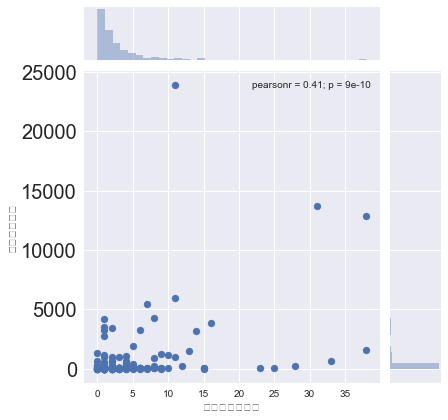

In [50]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df['회사의존속기간'], y=df['총다운로드수'])
plt.show()

In [51]:
df.groupby('엔진플랫폼')['총다운로드수','게임제목'].max()


,총다운로드수,게임제목
엔진플랫폼,,
Adobe Flash Professional,27,Wheely
Adventure Game Engine,13,Vive le Roi
Blender Engine,44,Caliper
Construct 2,9,Ultimate Solid
Construct2,3,Gaben Kingdom
Custom Engine,23861,Warlock's Tower
Game Maker Studio,961,Trick & Treat
MOAI,71,The Franz Kafka Videogame
Microsoft's XNA framework,5934,Braid


In [52]:
def peak(x):
    return x.max()

peak(df[df.엔진플랫폼=='Unity'])

게임제목                               iREC
조사날짜                         2017-06-14
스팀다운로드횟수                             91
스팀외다운로드 횟수                           94
스팀발매일                        2017-06-14
평점                                   10
가격                                43000
엔진플랫폼                             Unity
장르                                   호러
유튜브등록날짜                      2017-06-13
회사초창기설립날짜                          2017
회사존속기간                             2017
스팀발매일이전까지의유튜브등록날짜    1438 days 00:00:00
총다운로드수                             5447
매출액                         5.71935e+07
회사의존속기간                              33
dtype: object

In [53]:
df.groupby(df['엔진플랫폼']=='Unity')['총다운로드수','게임제목'].max()

,총다운로드수,게임제목
엔진플랫폼,,
False,23861,Zup! Zero
True,5447,iREC


In [54]:
df.groupby('엔진플랫폼')['총다운로드수','게임제목'].max()

,총다운로드수,게임제목
엔진플랫폼,,
Adobe Flash Professional,27,Wheely
Adventure Game Engine,13,Vive le Roi
Blender Engine,44,Caliper
Construct 2,9,Ultimate Solid
Construct2,3,Gaben Kingdom
Custom Engine,23861,Warlock's Tower
Game Maker Studio,961,Trick & Treat
MOAI,71,The Franz Kafka Videogame
Microsoft's XNA framework,5934,Braid


In [55]:
df.tail()

,게임제목,조사날짜,스팀다운로드횟수,스팀외다운로드 횟수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,스팀발매일이전까지의유튜브등록날짜,총다운로드수,매출액,회사의존속기간
199,Sig.NULL,2017-06-14,18,15,2016-09-27,7.0,2200.0,질문중 -Steam,캐쥬얼,2014-05-16,SaintHeiser,2011,2017,865 days,33,72600.0,6
200,Trick & Treat,2017-06-14,68,893,2016-09-27,10.0,0.0,Game Maker Studio,어드벤쳐,2016-05-17,Rabbiton,2015,2017,133 days,961,0.0,2
201,Haydee,2017-06-14,890,69,2016-09-27,9.0,16000.0,Custom Engine,액션,2016-07-31,Haydee Interactive,2016,2017,58 days,959,15344000.0,1
202,Pavilion,2017-06-14,34,12,2016-09-24,8.0,10500.0,Unity,어드벤쳐,2012-10-17,Visiontrick Media,2012,2017,1438 days,46,483000.0,5
203,DROD: Gunthro and the Epic Blunder,2017-06-14,16,20,2012-04-02,8.0,10500.0,Custom Engine,어드벤쳐,2012-09-04,Caravel Games,2002,2017,-155 days,36,378000.0,15


In [56]:
bins=[0,4600,9200,13800,18400,24000]
labels=['정말많이팔림','많이팔림','보통','안팔림','정말안팔림']
labels.reverse()
print(labels)
pd.cut(df.총다운로드수,bins,labels=labels)


['정말안팔림', '안팔림', '보통', '많이팔림', '정말많이팔림']


0       정말안팔림
1       정말안팔림
2       정말안팔림
3       정말안팔림
4         안팔림
5          보통
6       정말안팔림
7       정말안팔림
8       정말안팔림
9       정말안팔림
10      정말안팔림
11      정말안팔림
12      정말안팔림
13      정말안팔림
14      정말안팔림
15      정말안팔림
16      정말안팔림
17      정말안팔림
18      정말안팔림
19      정말안팔림
20      정말안팔림
21      정말안팔림
22      정말안팔림
23      정말안팔림
24        안팔림
25      정말안팔림
26     정말많이팔림
27      정말안팔림
28      정말안팔림
29      정말안팔림
        ...  
174     정말안팔림
175     정말안팔림
176     정말안팔림
177     정말안팔림
178     정말안팔림
179     정말안팔림
180     정말안팔림
181     정말안팔림
182     정말안팔림
183     정말안팔림
184     정말안팔림
185     정말안팔림
186     정말안팔림
187     정말안팔림
188     정말안팔림
189     정말안팔림
190     정말안팔림
191     정말안팔림
192     정말안팔림
193     정말안팔림
194     정말안팔림
195     정말안팔림
196     정말안팔림
197     정말안팔림
198     정말안팔림
199     정말안팔림
200     정말안팔림
201     정말안팔림
202     정말안팔림
203     정말안팔림
Name: 총다운로드수, Length: 204, dtype: category
Categories (5, object): [정말안팔림 < 안팔림 < 보통 < 많이팔림 < 정말많이팔림]

In [57]:
df['총다운로드수'].max()

23861

In [58]:
df['총다운로드수'].min()

0

In [59]:
df['총다운로드수'].median()

40.0

In [67]:
df.groupby('엔진플랫폼')['매출액','평점'].describe()

매출액                                           \
                          count          mean           std          min   
엔진플랫폼                                                                      
Adobe Flash Professional    1.0  5.940000e+04           NaN      59400.0   
Adventure Game Engine       1.0  5.720000e+04           NaN      57200.0   
Blender Engine              2.0  5.005000e+04  6.611448e+04       3300.0   
Construct 2                 1.0  5.850000e+04           NaN      58500.0   
Construct2                  1.0  6.600000e+03           NaN       6600.0   
Custom Engine              23.0  2.597030e+07  6.348826e+07      85000.0   
Game Maker Studio           6.0  4.228333e+04  5.055731e+04          0.0   
MOAI                        1.0  7.455000e+05           NaN     745500.0   
Microsoft's XNA framework   1.0  9.494400e+07           NaN   94944000.0   
RE engine                   1.0  7.564980e+08           NaN  756498000.0   
REBOL                       1.0  3.192000e+07           NaN   31920000.0   
RPG Maker MV                2.0  4.125000e+04  5.833631e+04          0.0   
RPG Maker VX                3.0  1.706867e+06  2.778781e+06      17600.0   
RPG Maker XP                1.0  0.000000e+00           NaN          0.0   
SDL                         1.0  1.620800e+07           NaN   16208000.0   
Stencyl                     2.0  6.380000e+04  3.422397e+04      39600.0   
TyranoBuilder               1.0  6.600000e+04           NaN      66000.0   
UbiArt Framework            1.0  2.528025e+08           NaN  252802500.0   
Unigine                     1.0  1.098000e+06           NaN    1098000.0   
Unity                      95.0  2.241782e+06  7.863206e+06          0.0   
Unreal                     24.0  4.403370e+06  1.232040e+07          0.0   
cocos2d                     1.0  9.450000e+04           NaN      94500.0   
wolf rpg mare               1.0  4.389000e+05           NaN     438900.0   
질문중 -Steam                 20.0  6.143025e+05  2.020402e+06          0.0   
질문중 -Youtube                1.0  5.170000e+04           NaN      51700.0   
질문중 -steam                  4.0  1.814450e+06  3.533799e+06          0.0   
질문해야함-누가 질문해놨음              1.0  2.750000e+05           NaN     275000.0   

                                                                               \
                                   25%          50%          75%          max   
엔진플랫폼                                                                           
Adobe Flash Professional       59400.0      59400.0      59400.0      59400.0   
Adventure Game Engine          57200.0      57200.0      57200.0      57200.0   
Blender Engine                 26675.0      50050.0      73425.0      96800.0   
Construct 2                    58500.0      58500.0      58500.0      58500.0   
Construct2                      6600.0       6600.0       6600.0       6600.0   
Custom Engine                 337250.0    1007500.0   10255000.0  250540500.0   
Game Maker Studio               6500.0      26750.0      58025.0     132000.0   
MOAI                          745500.0     745500.0     745500.0     745500.0   
Microsoft's XNA framework   94944000.0   94944000.0   94944000.0   94944000.0   
RE engine                  756498000.0  756498000.0  756498000.0  756498000.0   
REBOL                       31920000.0   31920000.0   31920000.0   31920000.0   
RPG Maker MV                   20625.0      41250.0      61875.0      82500.0   
RPG Maker VX                  103300.0     189000.0    2551500.0    4914000.0   
RPG Maker XP                       0.0          0.0          0.0          0.0   
SDL                         16208000.0   16208000.0   16208000.0   16208000.0   
Stencyl                        51700.0      63800.0      75900.0      88000.0   
TyranoBuilder                  66000.0      66000.0      66000.0      66000.0   
UbiArt Framework           252802500.0  252802500.0  252802500.0  252802500.0   
Unigine                      1098000.0    1098

In [85]:
def show(x):
    return x

show(df[df['엔진플랫폼']!='질문중 -steam'])
df[(df.엔진플랫폼 != '질문중 -steam') & (df.엔진플랫폼 != '질문중 -Steam')]

,게임제목,조사날짜,스팀다운로드횟수,스팀외다운로드 횟수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,스팀발매일이전까지의유튜브등록날짜,총다운로드수,매출액,회사의존속기간
0,Little Nightmare,2017-05-09,1196,331,2017-04-28,9.0,25800.0,Unreal,호러,2015-02-25,Tarsier Studios,2004,2017,793 days,1527,39396600.0,13
1,Bendy and the Ink machine Chapter one,2017-05-09,29,1307,2017-04-27,9.0,0.0,Unity,호러,2016-05-11,TheMeatly Games,2017,2017,351 days,1336,0.0,0
2,The SEXY BRUTAL,2017-05-09,214,14,2017-04-11,9.0,21000.0,Unity,어드벤쳐,2016-08-19,Tequila Works,2009,2017,235 days,228,4788000.0,8
3,Bendy and the Ink machine Chapter two,2017-05-09,89,7,2017-04-27,9.0,6500.0,Unity,호러,2016-05-11,TheMeatly Games,2017,2017,351 days,96,624000.0,0
4,Ori and the Blind Forest,2017-05-09,4734,713,2015-03-11,10.0,10500.0,Unity,액션,2014-06-09,Moon studios Gmbh,2010,2017,275 days,5447,57193500.0,7
5,Buy Valiant Hearts: The Great War /,2017-05-09,11234,2431,2014-01-26,10.0,18500.0,UbiArt Framework,어드벤쳐,2013-09-10,Ubisoft,1986,2017,138 days,13665,252802500.0,31
6,Pinstripe,2017-05-09,88,84,2017-04-25,9.0,16000.0,Unity,어드벤쳐,2014-07-15,Thomas Brush,2016,2017,1015 days,172,2752000.0,1
7,CLOCKWISE,2017-05-09,6,0,2017-05-02,NaN,4400.0,Unreal,어드벤쳐,2017-05-01,NaN,2017,2017,1 days,6,26400.0,0
8,"Jump,Step,Step",2017-05-09,2,1,2017-03-28,NaN,3300.0,Unreal,어드벤쳐,2017-03-29,NaN,2016,2017,-1 days,3,9900.0,1
9,Manipulated,2017-05-09,15,6,2017-03-29,8.0,5500.0,Unity,액션,2017-01-14,Wolfray Entertainment,2014,2017,74 days,21,115500.0,3


In [105]:
print(df[(df['엔진플랫폼']=='Unity')]['총다운로드수'].describe())
df[(df['엔진플랫폼']=='Unreal')]['총다운로드수'].describe()
#df.groupby(df['엔진플랫폼']=='Unity')['총다운로드수','게임제목'].max()

count      95.000000
mean      247.178947
std       771.857568
min         0.000000
25%        18.000000
50%        35.000000
75%       105.000000
max      5447.000000
Name: 총다운로드수, dtype: float64


count      24.000000
mean      171.708333
std       435.275872
min         1.000000
25%         6.000000
50%        30.500000
75%        59.750000
max      1598.000000
Name: 총다운로드수, dtype: float64

In [141]:
df.sort_values(by=['회사초창기설립날짜'],ascending=True)


,게임제목,조사날짜,스팀다운로드횟수,스팀외다운로드 횟수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,스팀발매일이전까지의유튜브등록날짜,총다운로드수,매출액,회사의존속기간
0,Little Nightmare,2017-05-09,1196,331,2017-04-28,9.0,25800.0,Unreal,호러,2015-02-25,Tarsier Studios,1979,2017,793 days,1527,39396600.0,13
1,Bendy and the Ink machine Chapter one,2017-05-09,29,1307,2017-04-27,9.0,0.0,Unity,호러,2016-05-11,TheMeatly Games,1979,2017,351 days,1336,0.0,0
2,The SEXY BRUTAL,2017-05-09,214,14,2017-04-11,9.0,21000.0,Unity,어드벤쳐,2016-08-19,Tequila Works,1984,2017,235 days,228,4788000.0,8
3,Bendy and the Ink machine Chapter two,2017-05-09,89,7,2017-04-27,9.0,6500.0,Unity,호러,2016-05-11,TheMeatly Games,1986,2017,351 days,96,624000.0,0
4,Ori and the Blind Forest,2017-05-09,4734,713,2015-03-11,10.0,10500.0,Unity,액션,2014-06-09,Moon studios Gmbh,1989,2017,275 days,5447,57193500.0,7
5,Buy Valiant Hearts: The Great War /,2017-05-09,11234,2431,2014-01-26,10.0,18500.0,UbiArt Framework,어드벤쳐,2013-09-10,Ubisoft,1992,2017,138 days,13665,252802500.0,31
6,Pinstripe,2017-05-09,88,84,2017-04-25,9.0,16000.0,Unity,어드벤쳐,2014-07-15,Thomas Brush,1994,2017,1015 days,172,2752000.0,1
7,CLOCKWISE,2017-05-09,6,0,2017-05-02,NaN,4400.0,Unreal,어드벤쳐,2017-05-01,NaN,2001,2017,1 days,6,26400.0,0
8,"Jump,Step,Step",2017-05-09,2,1,2017-03-28,NaN,3300.0,Unreal,어드벤쳐,2017-03-29,NaN,2002,2017,-1 days,3,9900.0,1
9,Manipulated,2017-05-09,15,6,2017-03-29,8.0,5500.0,Unity,액션,2017-01-14,Wolfray Entertainment,2002,2017,74 days,21,115500.0,3


In [127]:
df.회사초창기설립날짜.value_counts()

2016    58
2015    43
2014    24
2017    14
2013    14
2012    11
2011     8
2009     5
2010     4
2008     4
2002     3
2006     3
2007     2
1979     2
2005     1
2004     1
2003     1
2001     1
1994     1
1992     1
1989     1
1986     1
1984     1
Name: 회사초창기설립날짜, dtype: int64